# Convert checkpoints to pickle

Unlike the rest of this repo, this requires TF1.X and Python 3.7. It converts a TF checkpoint from MotionNet to a pickle file so we can use it in PyTorch.

In [2]:
import tensorflow as tf

import pickle
from tensorflow.python import pywrap_tensorflow

def read_checkpoint(path):
    reader = pywrap_tensorflow.NewCheckpointReader(path)
    var_to_shape_map = reader.get_variable_to_shape_map()
    the_map = {}
    for key in var_to_shape_map:
        the_map[key] = reader.get_tensor(key)
    return the_map
        
#data = read_checkpoint('./results/motionNet')
#from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

#data = print_tensors_in_checkpoint_file('./results/motionNet', tensor_name='', all_tensors=False)
#get_checkpoint = tf.train.latest_checkpoint('./results/')
#inspect_list = tf.train.list_variables(get_checkpoint)
#data

In [57]:
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

data = print_tensors_in_checkpoint_file('../../multisensory/results/nets/sep/full/net.tf-160000', tensor_name='', all_tensors=False)
#get_checkpoint = tf.train.latest_checkpoint('./results/')
#inspect_list = tf.train.list_variables(get_checkpoint)
#
data = read_checkpoint('../../multisensory/results/nets/sep/full/net.tf-160000')
data = {k:v for k, v in data.items() if k.startswith('im/conv1') or k.startswith('im/conv2')}

#data = {k: v for k, v in data.items() if 'Adam' not in k}
with open('../pretrained/shiftnet.pkl', 'wb') as f:
    pickle.dump(data, f)
#data['wconv'].shape

beta1_power (DT_FLOAT) []
beta2_power (DT_FLOAT) []
gen/bg/biases (DT_FLOAT) [2]
gen/bg/biases/Adam (DT_FLOAT) [2]
gen/bg/biases/Adam_1 (DT_FLOAT) [2]
gen/bg/weights (DT_FLOAT) [4,4,2,128]
gen/bg/weights/Adam (DT_FLOAT) [4,4,2,128]
gen/bg/weights/Adam_1 (DT_FLOAT) [4,4,2,128]
gen/conv1/BatchNorm/beta (DT_FLOAT) [64]
gen/conv1/BatchNorm/beta/Adam (DT_FLOAT) [64]
gen/conv1/BatchNorm/beta/Adam_1 (DT_FLOAT) [64]
gen/conv1/BatchNorm/gamma (DT_FLOAT) [64]
gen/conv1/BatchNorm/gamma/Adam (DT_FLOAT) [64]
gen/conv1/BatchNorm/gamma/Adam_1 (DT_FLOAT) [64]
gen/conv1/BatchNorm/moving_mean (DT_FLOAT) [64]
gen/conv1/BatchNorm/moving_variance (DT_FLOAT) [64]
gen/conv1/BatchNorm/renorm_mean (DT_FLOAT) [64]
gen/conv1/BatchNorm/renorm_mean_weight (DT_FLOAT) []
gen/conv1/BatchNorm/renorm_stddev (DT_FLOAT) [64]
gen/conv1/BatchNorm/renorm_stddev_weight (DT_FLOAT) []
gen/conv1/weights (DT_FLOAT) [4,4,2,64]
gen/conv1/weights/Adam (DT_FLOAT) [4,4,2,64]
gen/conv1/weights/Adam_1 (DT_FLOAT) [4,4,2,64]
gen/conv2/Ba

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


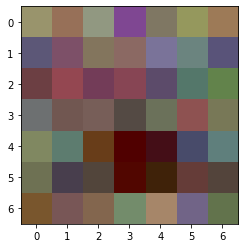

In [77]:
import matplotlib.pyplot as plt
plt.imshow(.5 + 2*data['im/conv1/weights'][2, :, :, :, 11])

In [77]:

data = {k: v for k, v in data.items() if 'Adam' not in k}
with open('../pretrained/motionnet.pkl', 'wb') as f:
    pickle.dump(data, f)
data['wconv'].shape

(6, 6, 6, 128)

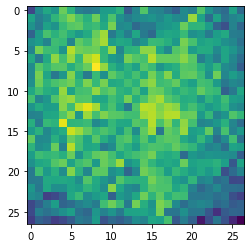

In [92]:
plt.imshow(data['wout'][:, 0].reshape((27, 27, 128))[:, :, 0])

In [29]:
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

def get_anim(result, norm=False):
    fig = plt.figure(figsize=(4, 4))
    ax = plt.gca()
    im = plt.imshow([[1]], cmap='gray')
    plt.axis('off')
    nt = result.shape[2]

    rg = None
    if norm:
        rg = [result.min(), result.max()]

    def drawframe(n):
        if n >= nt:
            n = nt - 1
        else:
            im.set_data(result[:, :, n])
        if norm:
            im.set_clim(rg)
        return (im)

    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, drawframe, frames=nt*2, interval=100, blit=False)
    plt.close()
    return anim

#anim = get_anim(data['wconv'][:, :, :, 1], norm=True).to_html5_video()
#HTML(anim)

# PredNet checkpoints

In [8]:
import h5py
#with open('../../prednet/model_data_keras2/tensorflow_weights/prednet_kitti_weights.hdf5', 'rb') as f:
data = h5py.File('../../prednet/model_data_keras2/tensorflow_weights/prednet_kitti_weights.hdf5')

In [12]:
#data['flatten_1'].keys()
data.keys()

<KeysViewHDF5 ['dense_2', 'flatten_1', 'input_1', 'prednet_1', 'timedistributed_1']>

In [57]:
data['prednet_1/prednet_1/layer_o_3/kernel:0'][:].shape

(3, 3, 576, 192)

In [45]:
data['prednet_1/prednet_1/'].keys()

<KeysViewHDF5 ['layer_a_0', 'layer_a_1', 'layer_a_2', 'layer_ahat_0', 'layer_ahat_1', 'layer_ahat_2', 'layer_ahat_3', 'layer_c_0', 'layer_c_1', 'layer_c_2', 'layer_c_3', 'layer_f_0', 'layer_f_1', 'layer_f_2', 'layer_f_3', 'layer_i_0', 'layer_i_1', 'layer_i_2', 'layer_i_3', 'layer_o_0', 'layer_o_1', 'layer_o_2', 'layer_o_3']>

In [43]:
anim = get_anim(kerns[:, :, :, 11], norm=True).to_html5_video()
HTML(anim)